# Seq2Seq

In [23]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()
char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀연습사랑'] 
# 범주형 데이터로 만들어줌
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len= len(num_dic)
print(dic_len) # 41개
# seq2seq 번역망
seq_data = [['word', '단어'], ['wood', '나무'], ['game', '놀이'], ['girl', '소녀'],
           ['test', '연습'], ['love', '사랑']]
def make_batch(seq_data):
    input_batch = []
    output_batch = []
    target_batch = []
    for seq in seq_data:
        input = [num_dic[n] for n in seq[0]] # 첫번째 입력되는 데이터는 'word'이 학습된 smoking gun
        output = [num_dic[n] for n in ('S' + seq[1])]
        target = [num_dic[n] for n in (seq[1] + 'E')] # 끝을 확인하기 위해서
        input_batch.append(np.eye(dic_len)[input]) #4X41
        output_batch.append(np.eye(dic_len)[output]) # 2X41
        target_batch.append(target)
    return input_batch, output_batch, target_batch

learning_rate = 0.01
n_hidden = 128
total_epoch = 100
n_class = n_input = dic_len

# encoder, decoder용 데이터 주입 변수
enc_input = tf.placeholder(tf.float32, [None, None, n_input])
dec_input = tf.placeholder(tf.float32, [None, None, n_input])
targets = tf.placeholder(tf.int64, [None, None])

with tf.variable_scope('encode'):
    # FFNN  한개 입력 -> 가중치 -> 출력 (n_hidden)
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden) # 41X128
    # 과적합 방지하기 위해 계산회로 생략 - random하게 생략
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5, seed=100) # 셀 4개, 셀당 41개 데이터
    outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input, dtype=tf.float32)
    
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)
    outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input, initial_state=enc_states, dtype=tf.float32) # 2X41
    # initial_state = enc_states 두 개의 망을 연결
    # 앞의 인코더망에서 출력된 states값 : 마지막 cell의 출력
    # 앞의 데이터를 다 고려한 특징
# outputs 6 X 2 X 128
# nclass 41
model = tf.layers.dense(outputs, n_class, activation=None) # 
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=model, labels=targets))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

41


In [24]:
input_batch, output_batch, target_batch = make_batch(seq_data)
for epoch in range(total_epoch):
    _, loss = sess.run([optimizer, cost],
                      feed_dict = {enc_input: input_batch,
                                  dec_input: output_batch,
                                  targets: target_batch})
    print('Epoch: ','%04d' % (epoch+1),
         'cost=', '{:.6f}'.format(loss))

Epoch:  0001 cost= 3.815924
Epoch:  0002 cost= 2.664495
Epoch:  0003 cost= 1.609294
Epoch:  0004 cost= 1.005041
Epoch:  0005 cost= 0.665634
Epoch:  0006 cost= 0.646492
Epoch:  0007 cost= 0.232702
Epoch:  0008 cost= 0.236079
Epoch:  0009 cost= 0.139182
Epoch:  0010 cost= 0.225341
Epoch:  0011 cost= 0.243303
Epoch:  0012 cost= 0.105662
Epoch:  0013 cost= 0.240422
Epoch:  0014 cost= 0.028817
Epoch:  0015 cost= 0.098052
Epoch:  0016 cost= 0.262648
Epoch:  0017 cost= 0.056608
Epoch:  0018 cost= 0.045765
Epoch:  0019 cost= 0.093921
Epoch:  0020 cost= 0.044274
Epoch:  0021 cost= 0.021767
Epoch:  0022 cost= 0.004151
Epoch:  0023 cost= 0.007884
Epoch:  0024 cost= 0.006843
Epoch:  0025 cost= 0.007901
Epoch:  0026 cost= 0.005999
Epoch:  0027 cost= 0.007032
Epoch:  0028 cost= 0.006426
Epoch:  0029 cost= 0.002757
Epoch:  0030 cost= 0.003826
Epoch:  0031 cost= 0.015208
Epoch:  0032 cost= 0.003167
Epoch:  0033 cost= 0.004130
Epoch:  0034 cost= 0.002395
Epoch:  0035 cost= 0.002463
Epoch:  0036 cost= 0

In [25]:
def translate(word):
    seq_data = [word, 'P'*len(word)]
    input_batch, output_batch, target_batch = make_batch([seq_data])
    prediction = tf.argmax(model, 2)
    result = sess.run(prediction, feed_dict={enc_input: input_batch,
                                            dec_input: output_batch,
                                            targets: target_batch})
    decoded = [char_arr[i] for i in result[0]]
    end = decoded.index('E')
    translated = ''.join(decoded[:end])
    return translated

print('word ->', translate('word'))

word -> 단어


# OCR : kakao API
## 카카오 
## https://wlstyql.tistory.com/121
## https://developers.kakao.com/docs/restapi/vision#OCR

In [34]:
# pip install opencv-python
import json
import cv2 # computer vision tool (이미지, 동영상 처리)
import requests # html 페이지 요청
import sys
LIMIT_PX = 1024
LIMIT_BYTE = 1028*1024
LIMIT_BOX = 40
# OCR 절차
# 이미지 사이즈 조정
# 글씨를 둘러싼 Box를 detection

In [43]:
def kakao_ocr_resize(image_path: str):
    image = cv2.imread('2.jpg')
    height, width, _ = image.shape
    if LIMIT_PX < height or LIMIT_PX < width:
        ratio = float(LIMIT_PX) / max(heigth, width)
        image = cv2.resize(image, None, fx=ratio, fy=ratio)
        height, width, _ = height, width, _ = image.shape
        image_path = "{}_resize.jpg".format('2')
        cv2.imwrite(image_path, image)
        return image_path
    return None

In [44]:
# 사용법
# open api 함수를 원격호출 (remote call)
def kakao_ocr_detect(image_path: str, appkey: str):
    API_URL ='https://kapi.kakao.com/v1/vision/text/detect'
    headers = {'Authorization': 'KakaoAK {}'.format('7d278c16a4138b64cf7e96eb6fb432a4')}
    image = cv2.imread('2.jpg') # 이미지 로드
    # naver는 jpg만, gif 애니메이션 지원, png 투명도 지원
    jpeg_image = cv2.imencode('.jpg', image)[1]
    data = jpeg_image.tobytes() # 네크워크 전송 -> serialization
    # 네트워크일 때 => 데이터가 시리얼로 가야 함 (모뎀)
    # 8개 라인으로 구성, 4개 회선만 사용 (1개 전송, 1개 수신)
    # 네트워크를 통해 함수 호출 (시간) : 비동기 방식
    # 동기 방식(호출 후 돌아올 때까지 기다림), 비동기 방식(다른 작업 중 -event 받아서 작업)
    # 대표적인 비동기 통신 방식이 AJAX : 웹 브라우저 내부적 처리
    # 인터넷 표준 데이터 형식 json
    return requests.post(API_URL, headers=headers, files={"file": data})

In [62]:
def kakao_ocr_recognize(image_path: str, boxes: list, appkey: str):
    API_URL = 'https://kapi.kakao.com/v1/vision/text/recognize'
    headers = {'Authorization': 'KakaoAK {}'.format('7d278c16a4138b64cf7e96eb6fb432a4')}
    image = cv2.imread('2.jpg')
    jpeg_image = cv2.imencode('.jpg', image)[1]
    data = jpeg_image.tobytes()
    # 인식은 BOX로 텍스트 구역을 확인하고, recognize 인식한다.
    return requests.post(API_URL, headers=headers, files={"file": data}, data={"boxes": json.dumps(boxes)})

In [65]:
def main():
    image_path, appkey = sys.argv[1], sys.argv[2]
    resize_impath = kakao_ocr_resize(image_path)
    output = kakao_ocr_detect(image_path, appkey).json()
    boxes = output['result']['boxes']
    boxes = boxes[:min(len(boxes), LIMIT_BOX)]
    output = kakao_ocr_recognize(image_path, boxes, appkey).json()
    return output
output = main()
output['result']

{'recognition_words': ['(고',
  '객',
  '용)',
  "Le수'용og제",
  '전표번호',
  '020298',
  '못향점',
  '김태준의',
  '탕탕집',
  '김태준',
  '서울',
  '강남구',
  '학동로4길',
  '12,',
  '1,2층(논현동)',
  '대표지',
  'TEL',
  '02-511-3235',
  '사업자',
  '536-37-00183',
  '물기',
  '6.',
  '818',
  '682',
  '줄',
  '이버',
  '새',
  '500',
  '',
  'IBKUI씨P두',
  '일시불',
  '카드번호',
  '6250-03**-****',
  '-4903 (C)',
  '거래일시',
  '2018/01/30',
  '12:46:24',
  'N',
  '12110079',
  '비씨카드사']}

# 동영상

In [16]:
import cv2
import numpy as np
history = 30
# cap = cv2.VideoCapture(0) # 0번 디바이스 - 카메라 영상을 받아 들임
cap = cv2.VideoCapture('corrupted_video.mp4')
if (cap.isOpened()==False): # 파일이 없거나 장치가 없거나
    print('에러 발생')
fgbg = cv2.createBackgroundSubtractorMOG2() # background filter
while (cap.isOpened()):
    ret, frame = cap.read() # 1개의 frame => 동영상은 ntsc방식 (초당 29.7 프레임)
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        fgmask = fgbg.apply(gray, learningRate=1.0/history)
        cv2.imshow('Frame', fgmask) # 이미지 출력
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

In [11]:
# 동영상 저장
import numpy as np
# 동영상 데이터 전처리 -> AI model 훈련 -> 실시간 인식
import cv2 # computer vision 처리 -> 사운드 불가
cap = cv2.VideoCapture('corrupted_video.mp4')
fourcc = cv2.VideoWriter_fourcc(*'XVID') # codec 설치
# 가장 많이 쓰는 코덱 ffmpeg 설치 및 환경설정 (못따라감..)
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read() # embeded 장치 ai npu (neural process unit) 삼성 엑시노스에 달려있음
    if ret == True:
        frame = cv2.flip(frame, 0) # 자동 차선인식, object detection
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) # 고속 연산을 위해서
        out.write(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

# AE (autoencoder)

## denoising autoencoder
- 원본 : noise 가 없는 학습 데이터
- 학습 : noise 가 있는 데이터 => 가중치
- autoencoder는 denosing을 한다

In [29]:
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def vis(images, save_name):
    dim = images.shape[0]
    n_image_rows = int(np.ceil(np.sqrt(dim)))
    n_image_cols = int(np.ceil(dim * 1.0/n_image_rows))
    gs = gridspec.GridSpec(n_image_rows, n_image_cols, top=1.,
                          bottom=0., right=1., left=0., hspace=0., wspace=0.)
    for g, count in zip(gs, range(int(dim))):
        ax = plt.subplot(g)
        ax.imshow(images[count,:].reshape((28,28)))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.savefig(save_name+'_vis.png')
    plt.show()
mnist_width = 28
n_visible = mnist_width * mnist_width
n_hidden = 500

corruption_level = 0.3
X = tf.placeholder('float', [None, n_visible], name='X')
mask = tf.placeholder('float', [None, n_visible], name='mask')
W_init_max = 4 * np.sqrt(6./ (n_visible+n_hidden))
# 균등분포에서 데이터 생성 (가중치 초기화)
W_init = tf.random_uniform(shape=[n_visible, n_hidden],
                          minval = -W_init_max, maxval=W_init_max)
W = tf.Variable(W_init, name='W')
b = tf.Variable(tf.zeros([n_hidden]), name='b')

W_prime = tf.transpose(W)
b_prime = tf.Variable(tf.zeros([n_visible]), name='b_prime')
def model(X, mask, W, b, W_prime, b_prime):
    tilde_X = mask * X
    Y = tf.nn.sigmoid(tf.matmul(tilde_X, W) + b)
    Z = tf.nn.sigmoid(tf.matmul(Y, W_prime) + b_prime)
    return Z
Z = model(X, mask, W, b, W_prime, b_prime)

# 원본 데이터 == 예측데이터 (자기 자신)
# autoencode input: 자기자신 == output: 자기자신
cost = tf.reduce_sum(tf.pow(X - Z, 2))
train_op = tf.train.GradientDescentOptimizer(0.02).minimize(cost)
predict_op = Z

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


0 110483.84
1 93674.164
2 87466.734
3 81557.23
4 79123.664
5 75596.59
6 73890.41
7 72043.984
8 71048.086
9 69806.31
10 68809.266
11 67453.586
12 66199.34
13 66092.58
14 64198.094
15 63677.043
16 63798.64
17 64689.086
18 64153.03
19 64035.24
20 63974.312
21 62712.395
22 62283.27
23 61889.41
24 61544.016
25 60487.84
26 61127.7
27 61692.758
28 60676.37
29 60979.035
30 60914.355
31 61281.234
32 60332.176
33 60046.02
34 60794.934
35 59695.375
36 59633.28
37 59845.77
38 58684.52
39 59446.29
40 60290.527
41 59742.15
42 59380.406
43 59043.254
44 59009.074
45 60373.418
46 58853.703
47 59235.062
48 58329.97
49 58289.6
50 58332.938
51 58993.24
52 59664.082
53 58434.746
54 58400.79
55 58385.844
56 58463.305
57 57428.062
58 58858.223
59 58229.39
60 58125.555
61 58197.79
62 57346.035
63 57638.625
64 58457.184
65 57627.13
66 57560.82
67 57682.844
68 57671.855
69 57537.438
70 57553.04
71 58925.773
72 57501.98
73 57026.266
74 57509.832
75 57433.12
76 57289.434
77 56981.477
78 57573.62
79 57054.62
80 57

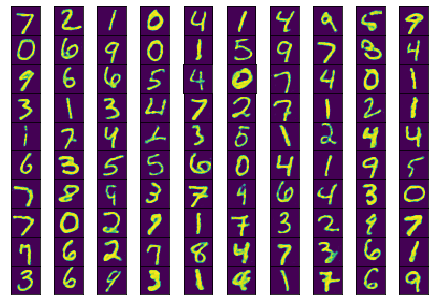

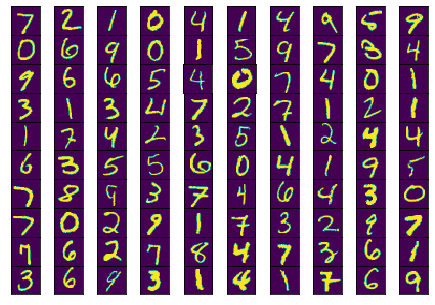

In [30]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(100):
        for start, end in zip(range(0, len(trX), 128),
                             range(128, len(trX)+1, 128)):
            input_ = trX[start:end]
            # 이항 분포로 마스크 생성 + 노이즈
            mask_np = np.random.binomial(1, 1-corruption_level, input_.shape)
            sess.run(train_op, feed_dict={X:input_, mask:mask_np})
        mask_np = np.random.binomial(1, 1-corruption_level, teX.shape)
        print(i, sess.run(cost, feed_dict={X:teX, mask:mask_np}))
        
    mask_np = np.random.binomial(1, 1-corruption_level, teX[:100].shape)
    predicted_imgs = sess.run(predict_op, feed_dict={X: teX[:100], mask: mask_np})
    input_imgs = teX[:100]
vis(predicted_imgs, 'pred')
vis(input_imgs, 'in')

# Variational autoencoder (VAE)

## 판별모델 (discrimitive model)
## generative model 생성모델 => 확률 평균 분산 => 분포가 나옴
## 잠재변수 (latent variable) : 키, 남자 -> 특징 + 노이즈
## https://excelsior-cjh.tistory.com/187

In [53]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
train, test = tf.keras.datasets.mnist.load_data()
train_x, train_y = train
from functools import partial
n_inputs = 28*28
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001
# without scaling 초기화
initializer = tf.contrib.layers.variance_scaling_initializer()

11493376/11490434 [==============================] - 1s 0us/step


In [54]:
# partial : 매개변수 일부를 고정 (상수화)
# elu : -1을 고려한 relu
my_dense_layer = partial(tf.layers.dense, activation=tf.nn.elu, kernel_initializer=initializer)
X = tf.placeholder(tf.float32, [None, n_inputs])
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3_mean = my_dense_layer(hidden2, n_hidden3, activation=None)
hidden3_sigma = my_dense_layer(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
# 평균, 분산 * 노이즈 (변동된 특성)
hidden3 = hidden3_mean + hidden3_sigma * noise
hidden4 = my_dense_layer(hidden3, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
logits = my_dense_layer(hidden5, n_outputs, activation=None)
output = tf.sigmoid(logits)

In [55]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits)
reconstruction_loss = tf.reduce_sum(xentropy) # 재구축 손실
eps = 1e-10 # log가 0으로 가는 것을 방지
# epsilon 상수 : 부동소수점 비교할 때 eps가 0.0001이면 차가 0.0001이하면 같은 것으로 봄
# cost function (log likelyhood 우도 확률)
# 지연 손실 (확률분포 곡선)
latent_loss = 0.5*tf.reduce_sum(tf.square(hidden3_sigma) + tf.square(hidden3_mean) - 1 - tf.log(eps + tf.square(hidden3_sigma)))
loss = reconstruction_loss + latent_loss
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [58]:
import sys
n_digits = 60
n_epochs = 50
batch_size = 150
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100*iteration//n_batches), end='')
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X:X_batch})
        loss_val, reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss, latent_loss],
                                                                feed_dict={X: X_batch})
        print("\r{}%".format(epoch), "Train total loss:", loss_val, "\t Reconstruction loss: ",
             reconstruction_loss_val, "\t Latent Loss: ", latent_loss_val)
    codings_rnd = np.random.normal(size=[n_digits, n_hidden3])
    outputs_val = output.eval(feed_dict={hidden3: cordings_rnd})

0% Train total loss: 29129.055 	 Reconstruction loss:  23122.781 	 Latent Loss:  6006.273
1% Train total loss: 28871.758 	 Reconstruction loss:  23727.629 	 Latent Loss:  5144.1294
2% Train total loss: 25571.133 	 Reconstruction loss:  21805.97 	 Latent Loss:  3765.1626
3% Train total loss: 26530.617 	 Reconstruction loss:  22133.613 	 Latent Loss:  4397.005
4% Train total loss: 24126.324 	 Reconstruction loss:  20146.465 	 Latent Loss:  3979.86
5% Train total loss: 26385.469 	 Reconstruction loss:  21279.111 	 Latent Loss:  5106.3584
6% Train total loss: 19643.873 	 Reconstruction loss:  16757.855 	 Latent Loss:  2886.017
7% Train total loss: 17920.383 	 Reconstruction loss:  15084.025 	 Latent Loss:  2836.357
8% Train total loss: 17511.248 	 Reconstruction loss:  14555.883 	 Latent Loss:  2955.366
9% Train total loss: 17369.365 	 Reconstruction loss:  14380.07 	 Latent Loss:  2989.2954
10% Train total loss: 16386.963 	 Reconstruction loss:  13346.947 	 Latent Loss:  3040.0159
11% Tra

NameError: name 'cordings_rnd' is not defined

In [ ]:
# 오토인코더 MNIST 큐 사용 예제
# https://bcho.tistory.com/1198?category=555440